# Leo Messi: his performance trhough data
Done in $R$

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS5TJXJ4946SAI1C5pI_g9Tc8P7TNcpuOF2eIa20ls4_3HhS46cyA&s)

In [1]:
data = read.csv('Lionel Messi Goals.csv',sep=';',stringsAsFactors = FALSE,na.strings = "")
head(data)

Date,Competition.Name,Home.team,Opponent,Away.team,Minute,Score.Home.Team...When.Messi.Scored,Score.Away.Team...When.Messi.Scored,Goal.Type,Goal.Method,Final.Game.Result
samedi 16 février 2019,Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won
dimanche 13 janvier 2019,Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won
samedi 22 décembre 2018,Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won
samedi 20 octobre 2018,Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won
dimanche 23 septembre 2018,Liga,FC Barcelona,Girona,Girona,19,1,0,Field goal,Left foot,Draw
samedi 18 août 2018,Liga,FC Barcelona,Alavés,Alavés,90+2,3,0,Field goal,Left foot,Won


In [2]:
str(data)

'data.frame':	651 obs. of  11 variables:
 $ Date                               : chr  "samedi 16 février 2019" "dimanche 13 janvier 2019" "samedi 22 décembre 2018" "samedi 20 octobre 2018" ...
 $ Competition.Name                   : chr  "Liga" "Liga" "Liga" "Liga" ...
 $ Home.team                          : chr  "FC Barcelona" "FC Barcelona" "FC Barcelona" "FC Barcelona" ...
 $ Opponent                           : chr  "Real Valladolid" "Eibar" "Celta de Vigo" "Sevilla" ...
 $ Away.team                          : chr  "Real Valladolid" "Eibar" "Celta de Vigo" "Sevilla" ...
 $ Minute                             : chr  "43" "53" "45" "12" ...
 $ Score.Home.Team...When.Messi.Scored: int  1 2 2 2 1 3 1 3 2 1 ...
 $ Score.Away.Team...When.Messi.Scored: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Goal.Type                          : chr  "Penalty" "Field goal" "Field goal" "Field goal" ...
 $ Goal.Method                        : chr  "Left foot" "Left foot" "Left foot" "Left foot" ...
 $ Final.Game.Res

Number of instances and attributes:

In [3]:
dim(data)

[1] 651  11

In [4]:
colnames(data)[7:8] <- c('Score.Home.Team','Score.Away.Team')
colnames(data)

[1] "Date"              "Competition.Name"  "Home.team"        
 [4] "Opponent"          "Away.team"         "Minute"           
 [7] "Score.Home.Team"   "Score.Away.Team"   "Goal.Type"        
[10] "Goal.Method"       "Final.Game.Result"

Inquiring whether there are NA values:

In [5]:
attrs <- colnames(data)
for(attr in attrs) { sentence <-any(is.na(data[attr]))
                     print(paste(attr,':',sentence))}

[1] "Date : FALSE"
[1] "Competition.Name : TRUE"
[1] "Home.team : FALSE"
[1] "Opponent : FALSE"
[1] "Away.team : FALSE"
[1] "Minute : FALSE"
[1] "Score.Home.Team : FALSE"
[1] "Score.Away.Team : FALSE"
[1] "Goal.Type : TRUE"
[1] "Goal.Method : FALSE"
[1] "Final.Game.Result : FALSE"


Selecting day of the week, number of day, month and year:

In [6]:
library(stringr)

In [7]:
data$Date<- str_split(data$Date,' ')

In [8]:
day <- list()
n_day <- list()
month <- list()
year <- list()
for(index in 1:dim(data)[1]){day[index] <- data$Date[[index]][1]
                             n_day[index] <- data$Date[[index]][2] 
                             month[index] <- data$Date[[index]][3]
                             year[index] <- data$Date[[index]][4]}
data$day <- unlist(day)
data$n_day <- unlist(n_day)
data$month <- unlist(month)
data$year <- unlist(year)

In [9]:
data$Date <- NULL

Translating *day* and *month* into English

In [10]:
unique_days <-unique(data$day)
unique_months <-unique(data$month)
days <- c('Saturday','Sunday','Wednesday','Thuesday','Monday','Thursday','Friday')
month <- c('February','January','December','October','September','August','May','April','March','November','June','July')
for(index in 1:dim(data)[1]){index_day <- which(data$day[index]==unique_days)
                             data$day[index] <- days[index_day]
                             index_month <- which(data$month[index]==unique_months)
                             data$month[index]<- month[index_month]}

Editing additional minutes 

In [11]:
indexes_plus <-str_which(data$Minute,'[+]')
minutes_edited <- str_split(data$Minute[indexes_plus],'[+]')
for(i in 1:length(minutes_edited)){min <- as.numeric(minutes_edited[[i]][1])
                                   add <- as.numeric(minutes_edited[[i]][2])
                                   minutes_edited[i] <- min + add}
minutes_edited <- unlist(minutes_edited)

In [12]:
data$Minute[indexes_plus]<- minutes_edited
data$Minute <- as.numeric(data$Minute)

In [13]:
head(data)

Competition.Name,Home.team,Opponent,Away.team,Minute,Score.Home.Team,Score.Away.Team,Goal.Type,Goal.Method,Final.Game.Result,day,n_day,month,year
Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won,Saturday,16,February,2019
Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won,Sunday,13,January,2019
Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won,Saturday,22,December,2018
Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won,Saturday,20,October,2018
Liga,FC Barcelona,Girona,Girona,19,1,0,Field goal,Left foot,Draw,Sunday,23,September,2018
Liga,FC Barcelona,Alavés,Alavés,92,3,0,Field goal,Left foot,Won,Saturday,18,August,2018


Packages:

In [14]:
library(plotly)
library(dplyr)
library(ggplot2)
library(ggthemes)
library(party)

Loading required package: ggplot2

Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.5.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich

Attaching package: 'strucchange'

The following object is masked from 'package:stringr':

    boundary



# Goals by competition

In [15]:
competition<-table(data$Competition.Name,exclude = NULL)
rownames(competition)[5] <- 'Unknown'
df_competition <- data.frame(competition)
colnames(df_competition) <- c('Competition','Goals')
df_competition = arrange(df_competition,desc(Competition))
df_competition$porcentage <- round(df_competition$Goals*100/sum(df_competition$Goals))
df_competition$position = cumsum(df_competition$porcentage) - df_competition$porcentage/2
df_competition$label <- paste(df_competition$porcentage,"%")

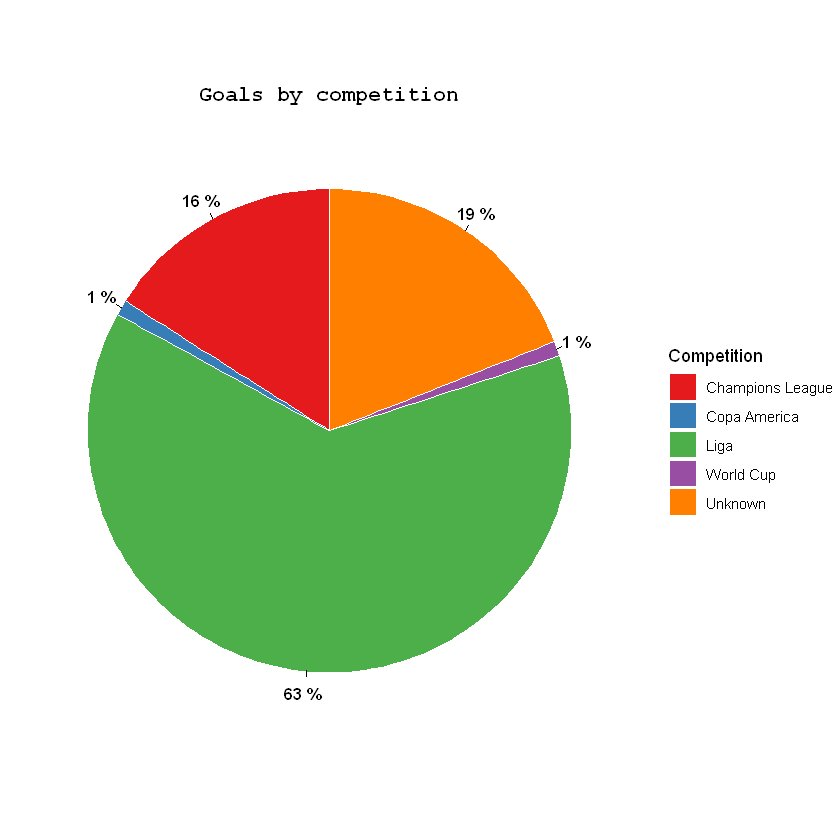

In [16]:
ggplot(df_competition) + geom_bar(aes(x="",y=porcentage,fill=Competition),col='white',stat = "identity") +
coord_polar(theta="y",start=0) + theme_void() + ggtitle('Goals by competition') + 
theme(plot.title= element_text(hjust = 0.5,face = 'bold',family = 'mono')) +
geom_text(aes(x=1.53,y = position , label = label), col='black',size=3.5,fontface =2) +
geom_segment(aes(x = 1.445, y = position, xend = 1.47, yend = position))+
scale_fill_brewer(palette="Set1")

# Goals by years

In [17]:
years <- table(data$year)
df_years <- data.frame(years)
colnames(df_years) <- c('Year','Goals')

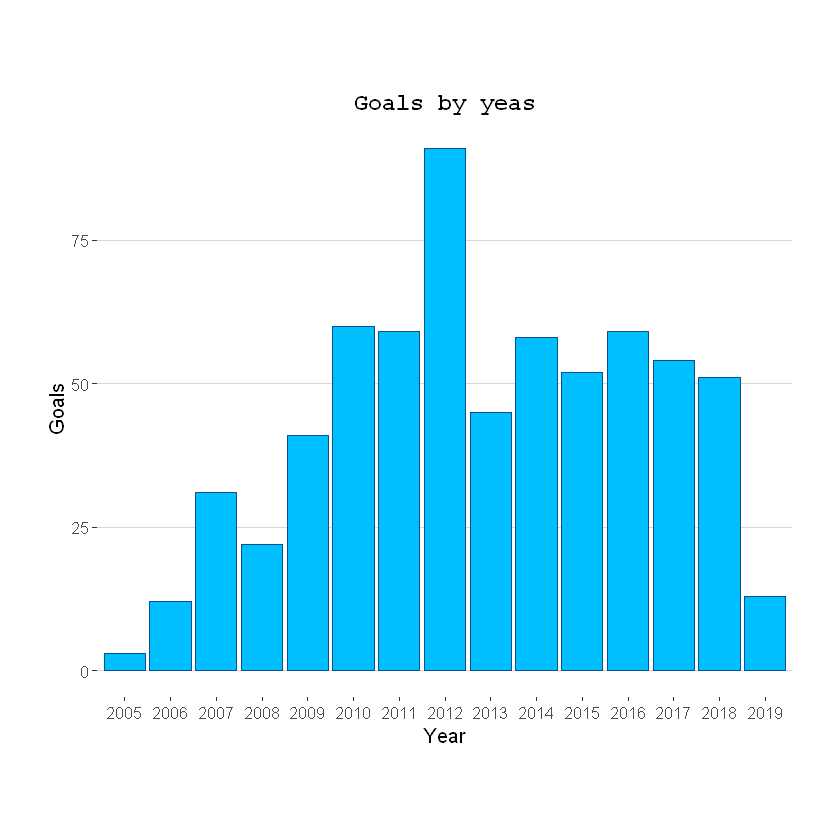

In [18]:
ggplot(df_years) + geom_bar(aes(x=Year,y=Goals),stat = 'identity',fill= 'deepskyblue',col='dodgerblue4') +
theme(plot.title= element_text(hjust = 0.5,face = 'bold',family = 'mono'),
     plot.margin = margin(2,1,2,1, "cm")) +
ggtitle('Goals by yeas') + theme_hc()

- Messi has had a hight performance since 2009
- The top of his tops is in 2012

# Performance in La Liga
I'm in this case considering the *unknown* data 

In [19]:
liga <- filter(data,Competition.Name == 'Liga' | Competition.Name == 'Unknown')

In [20]:
head(liga)

Competition.Name,Home.team,Opponent,Away.team,Minute,Score.Home.Team,Score.Away.Team,Goal.Type,Goal.Method,Final.Game.Result,day,n_day,month,year
Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won,Saturday,16,February,2019
Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won,Sunday,13,January,2019
Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won,Saturday,22,December,2018
Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won,Saturday,20,October,2018
Liga,FC Barcelona,Girona,Girona,19,1,0,Field goal,Left foot,Draw,Sunday,23,September,2018
Liga,FC Barcelona,Alavés,Alavés,92,3,0,Field goal,Left foot,Won,Saturday,18,August,2018


### Goals scored to clubs

In [21]:
clubs_laliga <- data.frame(sort(table(liga$Opponent),decreasing = T))
colnames(clubs_laliga) <- c('Club','Goals')

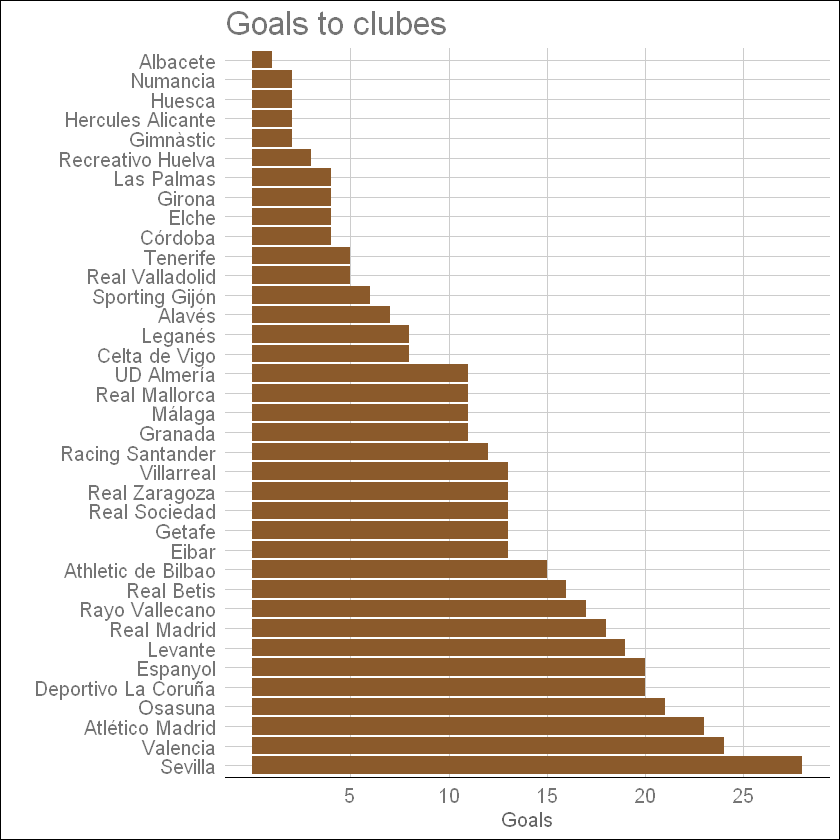

In [22]:
ggplot(data=clubs_laliga) + geom_bar(aes(x=Club,y=Goals),stat='identity',fill='tan4') + 
scale_y_continuous(breaks=seq(5,25,5)) + coord_flip() + 
labs(x='',title='Goals to clubes') + theme_gdocs()

### Goals by minute

In [23]:
minutes_laliga <- data.frame(sort(table(liga$Minute),decreasing = T))
colnames(minutes_laliga)<- c('Minute','Goals')

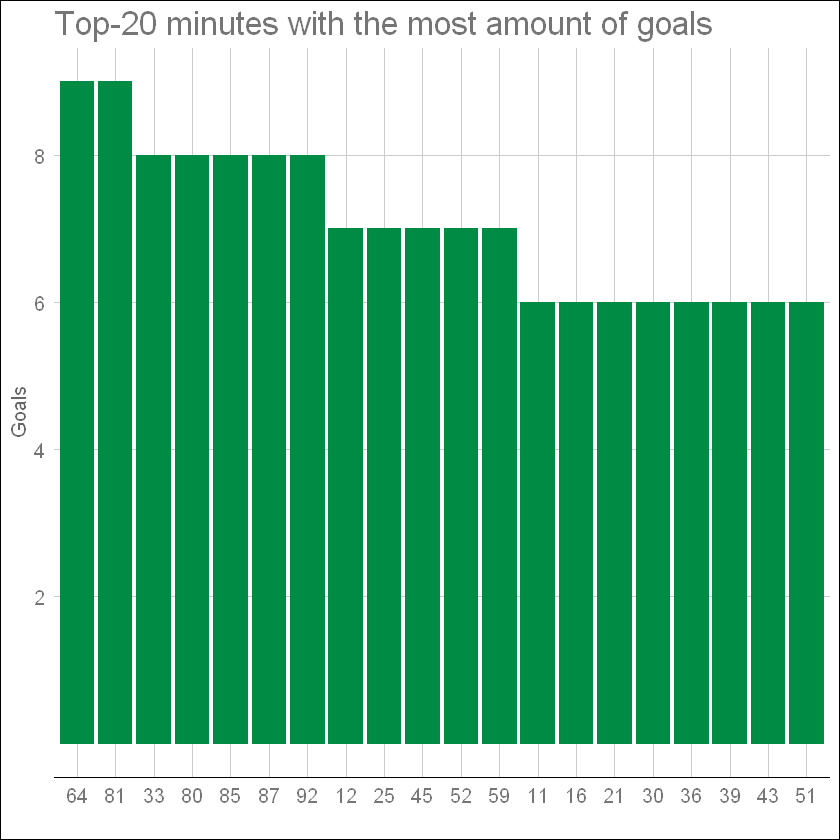

In [24]:
ggplot(data=minutes_laliga[1:20,]) + geom_bar(aes(x=Minute,y=Goals),stat='identity',fill='springgreen4') + 
scale_y_continuous(breaks=seq(2,10,2))+
labs(x='',title='Top-20 minutes with the most amount of goals') + theme_gdocs()

### Non goal minute

In [25]:
non_goal_minutes <- list()
index <- 1
for (min in 1:90){if(!min %in% liga$Minute){non_goal_minutes[index]<- min
                                            index <- index +1 }} 
non_goal_minutes

[[1]]
[1] 1

[[2]]
[1] 2

[[3]]
[1] 34

[[4]]
[1] 69

### Goals by period of play
Goals by first, second half and additional time 

In [26]:
period <- rep(0,3)
for (min in liga$Minute){if(min<45){ period[1] <- period[1]+1} 
                                   else {if(89 < min){period[3]<- period[3]+1}
                                          else {period[2]<- period[2]+1} } }  
goals_period <- data.frame('Period'=c('first half','second half','additional time'),'Goals'=period)
goals_period = arrange(goals_period,desc(Period))
goals_period$porcentage <- round(goals_period$Goals*100/sum(goals_period$Goals))
goals_period$position = cumsum(goals_period$porcentage) - goals_period$porcentage/2
goals_period$label <- paste(goals_period$porcentage,"%")

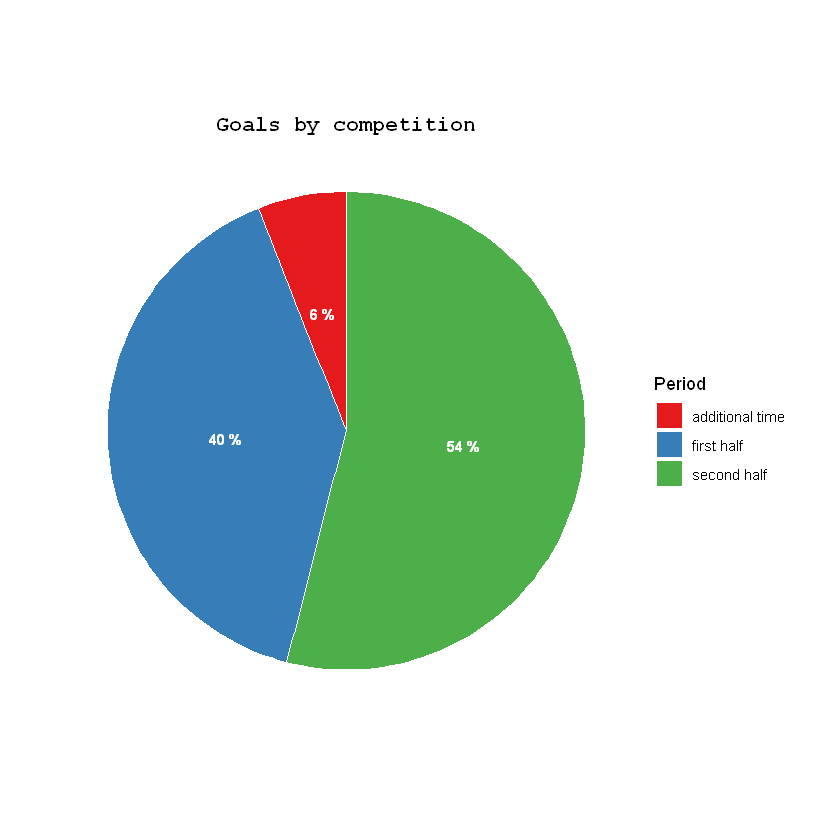

In [27]:
ggplot(goals_period) + geom_bar(aes(x="",y=porcentage,fill=Period),col='white',stat = "identity") +
coord_polar(theta="y",start=0) + theme_void() + ggtitle('Goals by competition') + 
theme(plot.title= element_text(hjust = 0.5,face = 'bold',family = 'mono'),
     plot.margin = margin(1,1,1,1, "cm")) +
geom_text(aes(x=1,y = position , label = label), col='white',size=3.2,fontface =2) +
scale_fill_brewer(palette="Set1")

### Goals by month

In [28]:
months <- table(liga$month)
df_months <- data.frame(months)
colnames(df_months) <- c('Month','Goals')
#Setting the hierarchy by sequence order
months_ord <- c('January','February','March','April','May','June','July','August','September','October','November','December')
df_months$Month <- factor(df_months$Month,levels=months_ord)
df_months <- rbind(df_months,c('July','0'))
df_months$Goals <- as.numeric(df_months$Goals)

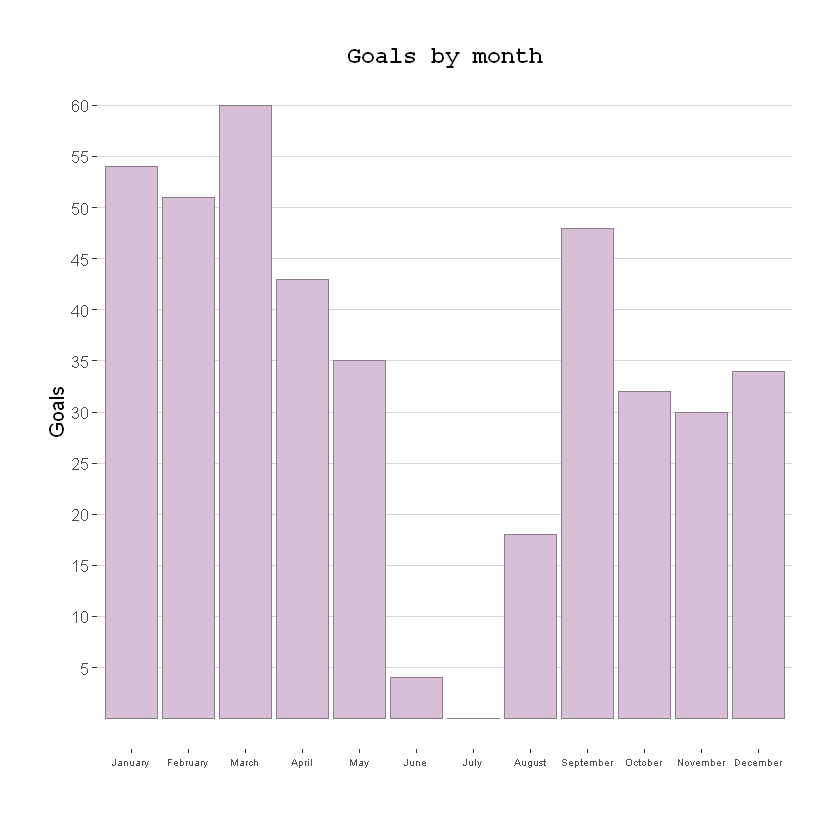

In [29]:
ggplot(df_months)+ geom_bar(aes(x=Month,y=Goals),stat='identity',fill='thistle',colour='thistle4')+ 
scale_y_continuous(breaks=seq(5,60,5))+ labs(x='',title='Goals by month') + theme_hc() +
theme(plot.title= element_text(hjust = 0.5,face = 'bold',family = 'mono'),
     plot.margin = margin(1,1,1,1, "cm"),
     axis.text.x=element_text(size=6))

## Goals by day of the week

In [30]:
days <- table(liga$day)
df_days <- data.frame(days)
colnames(df_days) <- c('Day','Goals')
#Setting the hierarchy by sequence order
days_ord <- c('Monday','Thuesday','Wednesday','Thursday','Friday','Saturday','Sunday')
df_days$Day <- factor(df_days$Day,levels=days_ord)
df_days <- rbind(df_days,c('Friday','0'))
df_days$Goals <- as.numeric(df_days$Goals)

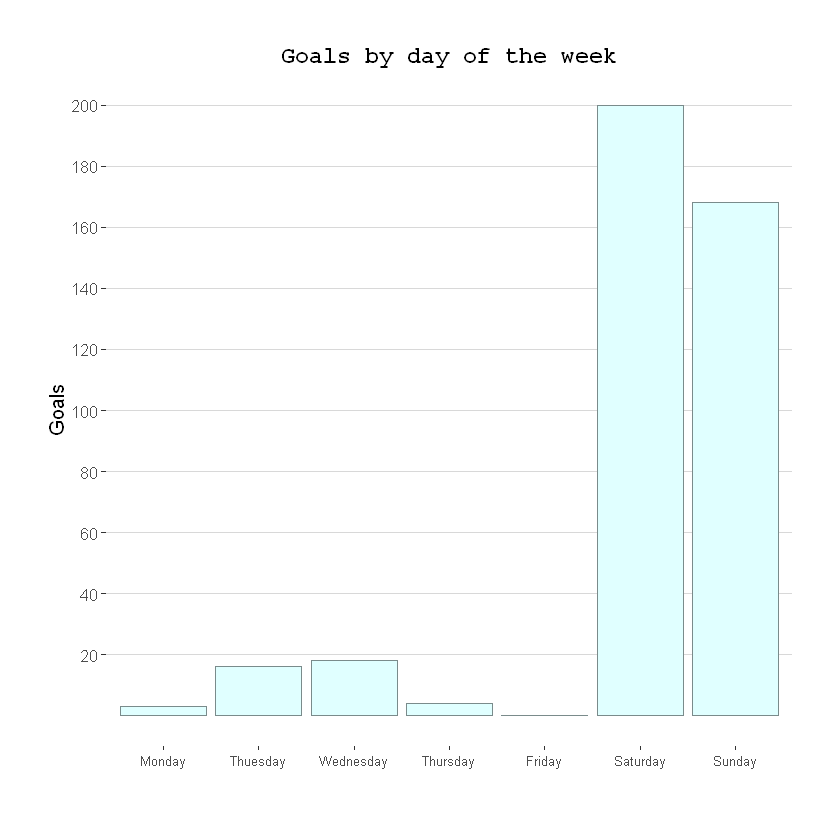

In [31]:
ggplot(df_days)+ geom_bar(aes(x=Day,y=Goals),stat='identity',fill='lightcyan',colour='lightcyan4')+ 
scale_y_continuous(breaks=seq(20,200,20))+ labs(x='',title='Goals by day of the week') + theme_hc() +
theme(plot.title= element_text(hjust = 0.5,face = 'bold',family = 'mono'),
     plot.margin = margin(1,1,1,1, "cm"),
     axis.text.x=element_text(size=8))

### Type of goal

In [32]:
type_goal <- table(liga$Goal.Type,exclude= NULL)
rownames(type_goal)[6] <- "Unknown"
type_goal <- data.frame(type_goal)
colnames(type_goal) <- c('Type_of_goal','Goals')
type_goal = arrange(type_goal,desc(Type_of_goal))
type_goal$porcentage <- round(type_goal$Goals*100/sum(type_goal$Goals))
type_goal$position = cumsum(type_goal$porcentage) - type_goal$porcentage/2
type_goal$label <- paste(type_goal$porcentage,"%")

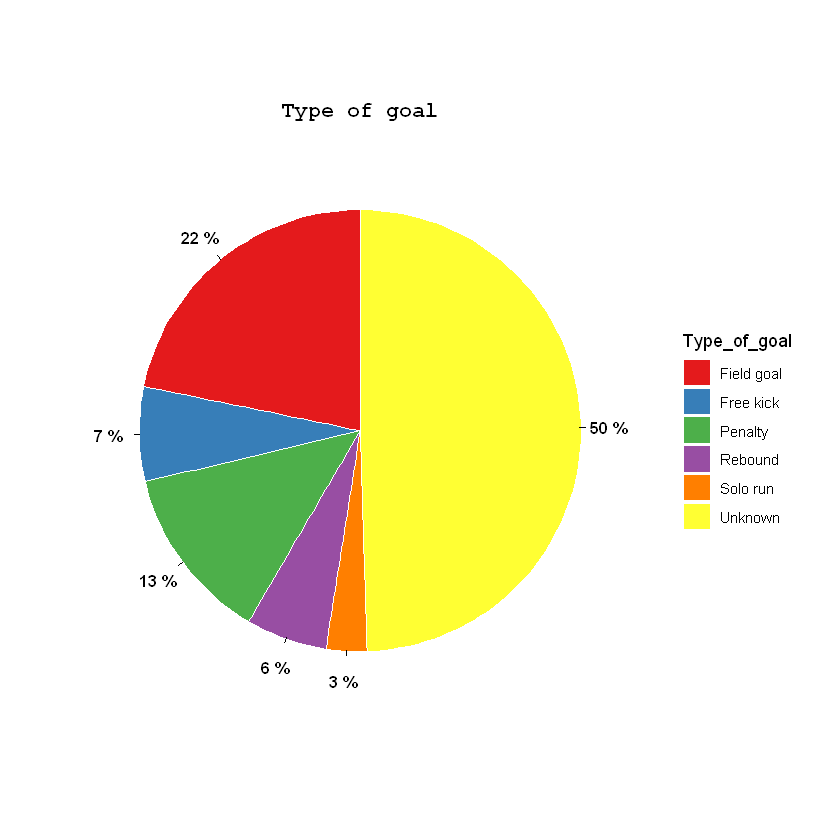

In [33]:
ggplot(type_goal) + geom_bar(aes(x="",y=porcentage,fill=Type_of_goal),col='white',stat = "identity") +
coord_polar(theta="y",start=0) + theme_void() + ggtitle('Type of goal') + 
theme(plot.title= element_text(hjust = 0.5,face = 'bold',family = 'mono'),
     plot.margin = margin(1,1,1,1, "cm")) +
geom_text(aes(x=1.57,y = position , label = label), col='black',size=3.5,fontface =2) +
geom_segment(aes(x = 1.445, y = position, xend = 1.47, yend = position))+
scale_fill_brewer(palette="Set1")

### Global analysis

In [34]:
#Changing to factors
liga$Goal.Method <- as.factor(liga$Goal.Method)
liga$day<- as.factor(liga$day)
liga$month <- as.factor(liga$month)
liga$Final.Game.Result<- as.factor(liga$Final.Game.Result)

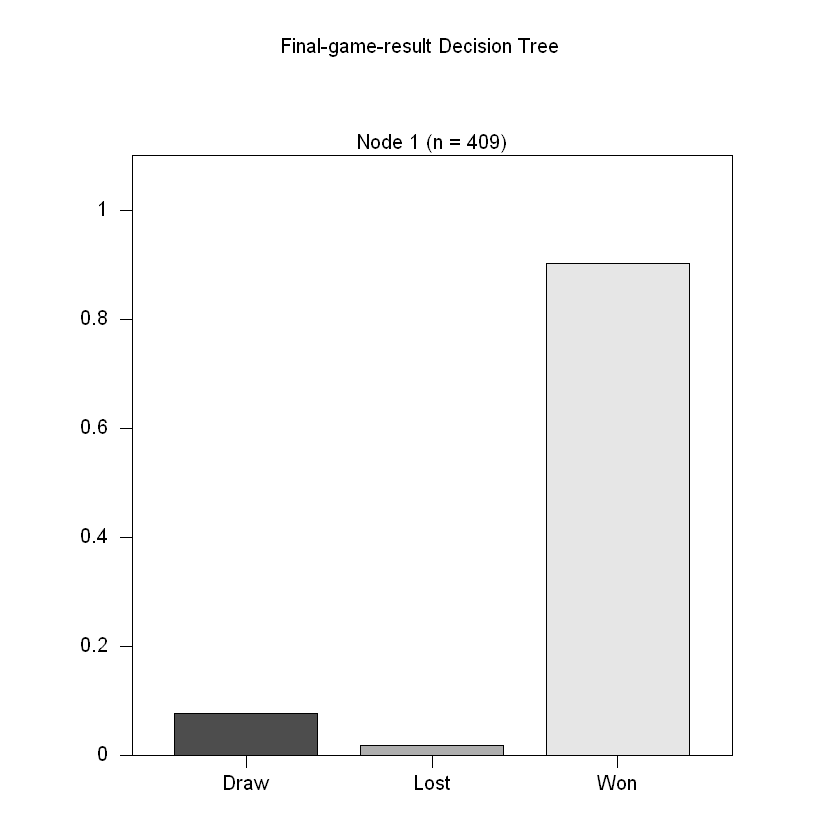

In [35]:
dataset <- liga[,c(5,9,10,11,13)]
tree <- ctree(Final.Game.Result ~.,data= dataset)
plot(tree, main= "Final-game-result Decision Tree")

- There is no a relationship between the victory of Barcelona F.C. and the rest of the attributes 
- His favourite day to score goals is on Saturdays
- He fells more comfortable scoring on second halfs

## Performance in The Champions League

In [36]:
champion <- filter(data,Competition.Name == 'Champions League')

### Goals scored to clubs

In [37]:
clubs_lachampion <- data.frame(sort(table(champion$Opponent),decreasing = T))
colnames(clubs_lachampion) <- c('Club','Goals')

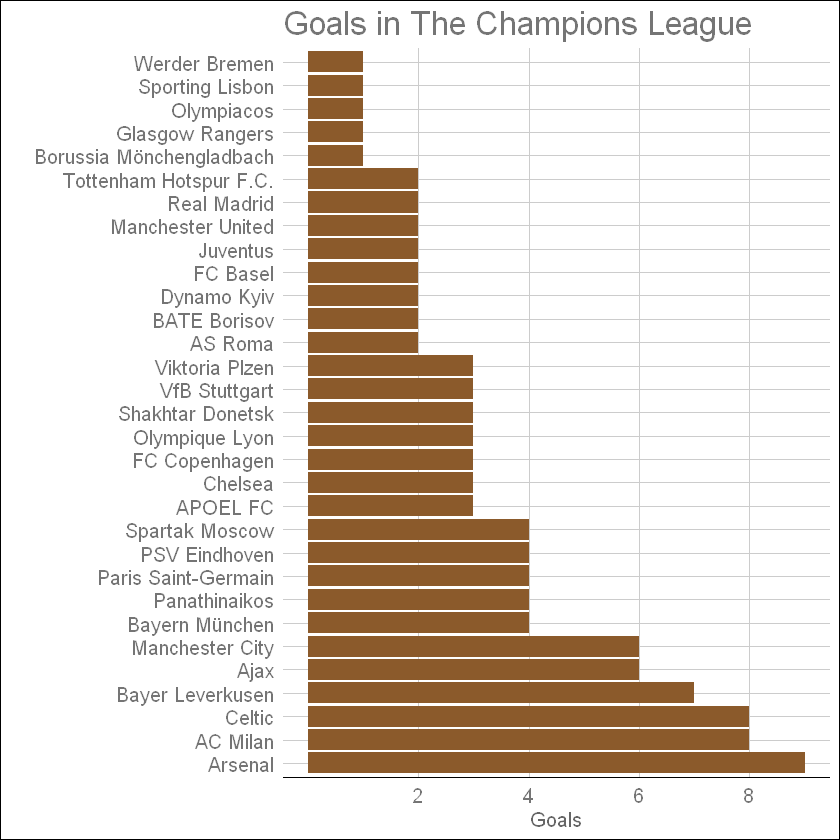

In [38]:
ggplot(data=clubs_lachampion) + geom_bar(aes(x=Club,y=Goals),stat='identity',fill='tan4') + 
scale_y_continuous(breaks=seq(2,10,2)) + labs(title="Goals in The Champions League",x="") +
coord_flip()  + theme_gdocs()

### Goals by minute

In [39]:
minutes_lachampion <- data.frame(sort(table(champion$Minute),decreasing = T))
colnames(minutes_lachampion)<- c('Minute','Goals')

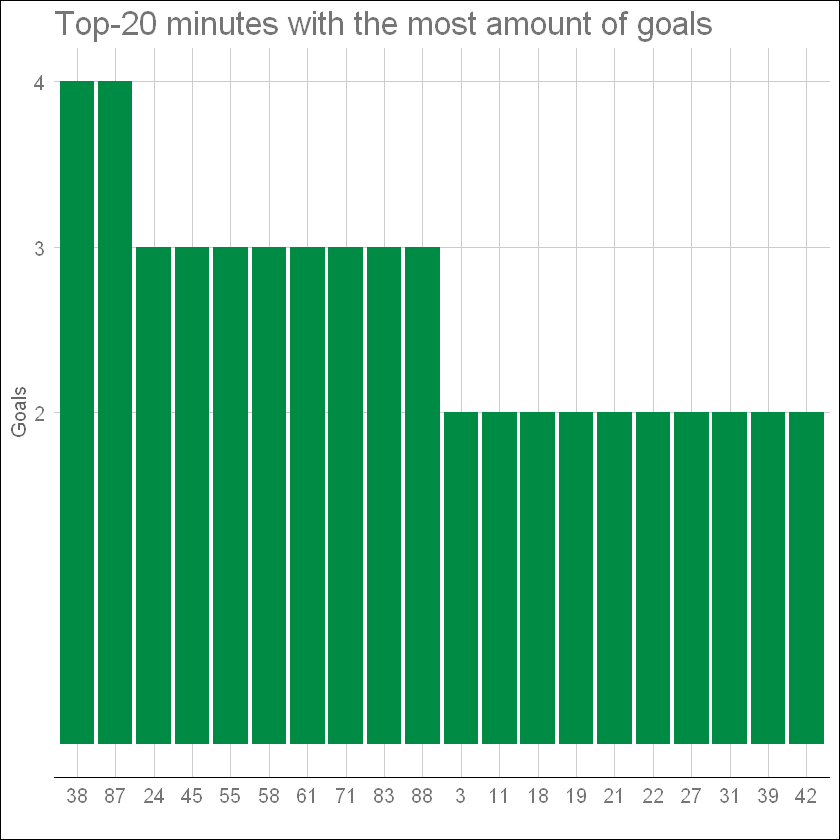

In [40]:
ggplot(data=minutes_lachampion[1:20,]) + geom_bar(aes(x=Minute,y=Goals),stat='identity',fill='springgreen4') + 
scale_y_continuous(breaks=seq(2,4,1))+
labs(x='',title='Top-20 minutes with the most amount of goals') + theme_gdocs()

### Non goal minutes

In [41]:
non_goal_minutes <- list()
index <- 1
for (min in 1:90){if(!min %in% champion$Minute){non_goal_minutes[index]<- min
                                            index <- index +1 }} 
non_goal_minutes

[[1]]
[1] 1

[[2]]
[1] 2

[[3]]
[1] 6

[[4]]
[1] 7

[[5]]
[1] 8

[[6]]
[1] 10

[[7]]
[1] 12

[[8]]
[1] 14

[[9]]
[1] 15

[[10]]
[1] 28

[[11]]
[1] 29

[[12]]
[1] 33

[[13]]
[1] 35

[[14]]
[1] 44

[[15]]
[1] 46

[[16]]
[1] 47

[[17]]
[1] 51

[[18]]
[1] 52

[[19]]
[1] 53

[[20]]
[1] 57

[[21]]
[1] 64

[[22]]
[1] 65

[[23]]
[1] 66

[[24]]
[1] 68

[[25]]
[1] 72

[[26]]
[1] 73

[[27]]
[1] 74

[[28]]
[1] 78

[[29]]
[1] 81

[[30]]
[1] 82

[[31]]
[1] 85

### Goals by period
Goals by first, second half and additional time

In [42]:
period <- rep(0,3)
for (min in champion$Minute){if(min<45){ period[1] <- period[1]+1} 
                                   else {if(89 < min){period[3]<- period[3]+1}
                                          else {period[2]<- period[2]+1} } }  
goals_period <- data.frame('Period'=c('first half','second half','additional time'),'Goals'=period)
goals_period = arrange(goals_period,desc(Period))
goals_period$porcentage <- round(goals_period$Goals*100/sum(goals_period$Goals))
goals_period$position = cumsum(goals_period$porcentage) - goals_period$porcentage/2
goals_period$label <- paste(goals_period$porcentage,"%")

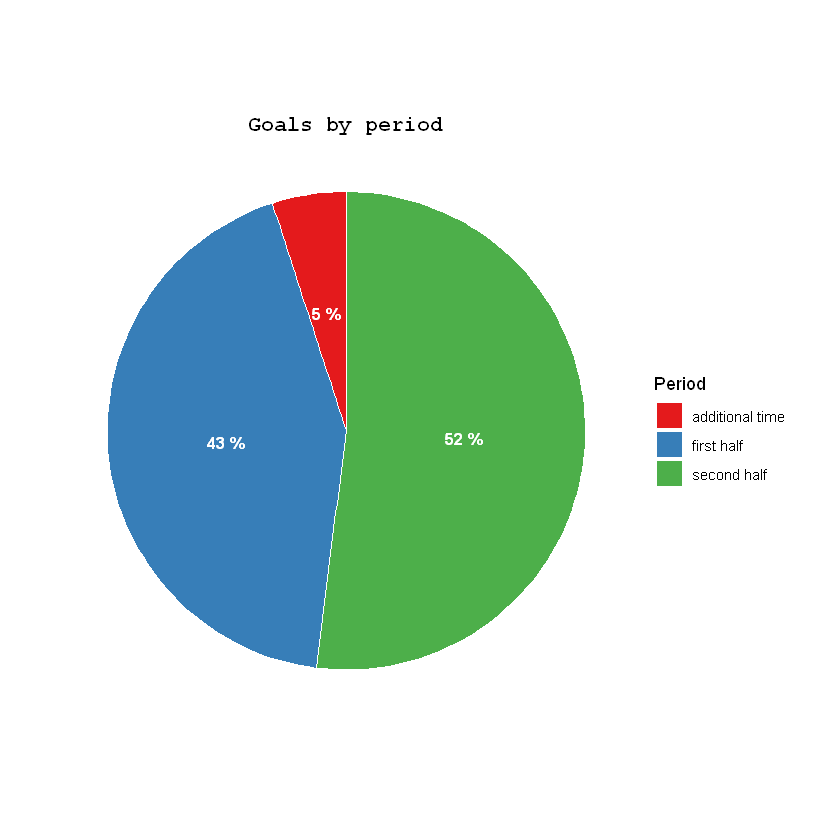

In [43]:
ggplot(goals_period) + geom_bar(aes(x="",y=porcentage,fill=Period),col='white',stat = "identity") +
coord_polar(theta="y",start=0) + theme_void() + ggtitle('Goals by period') + 
theme(plot.title= element_text(hjust = 0.5,face = 'bold',family = 'mono'),
     plot.margin = margin(1,1,1,1, "cm")) +
geom_text(aes(x=1,y = position , label = label), col='white',size=3.5,fontface =2) +
scale_fill_brewer(palette="Set1")

### Goals by month

In [44]:
months <- table(champion$month)
df_months <- data.frame(months)
colnames(df_months) <- c('Month','Goals')
df_months$Month <- factor(df_months$Month,levels=months_ord)
df_months <- rbind(df_months,c('June','0'))
df_months <- rbind(df_months,c('July','0'))
df_months <- rbind(df_months,c('August','0'))
df_months$Goals <- as.numeric(df_months$Goals)

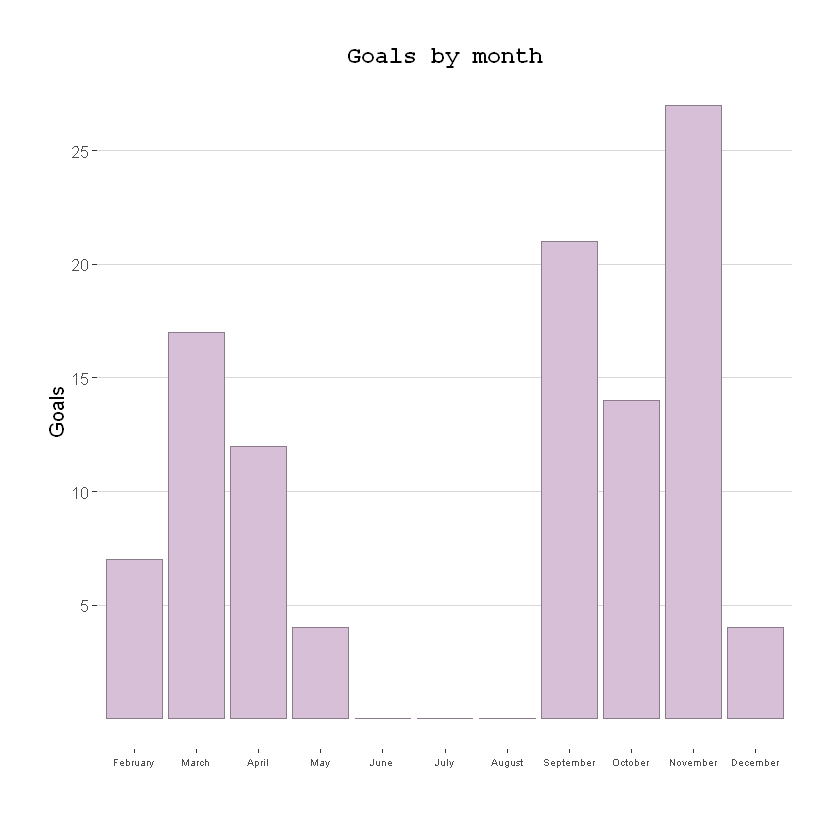

In [45]:
ggplot(df_months)+ geom_bar(aes(x=Month,y=Goals),stat='identity',fill='thistle',colour='thistle4')+ 
scale_y_continuous(breaks=seq(5,30,5))+ labs(x='',title='Goals by month') + theme_hc() +
theme(plot.title= element_text(hjust = 0.5,face = 'bold',family = 'mono'),
     plot.margin = margin(1,1,1,1, "cm"),
     axis.text.x=element_text(size=6))

### Goals by the day of the week

In [46]:
days <- table(champion$day)
df_days <- data.frame(days)
colnames(df_days) <- c('Day','Goals')
df_days$Day <- factor(df_days$Day,levels=days_ord)
df_days <- rbind(df_days,c('Monday','0'))
df_days <- rbind(df_days,c('Thursday','0'))
df_days <- rbind(df_days,c('Friday','0'))
df_days <- rbind(df_days,c('Sunday','0'))
df_days$Goals <- as.numeric(df_days$Goals)

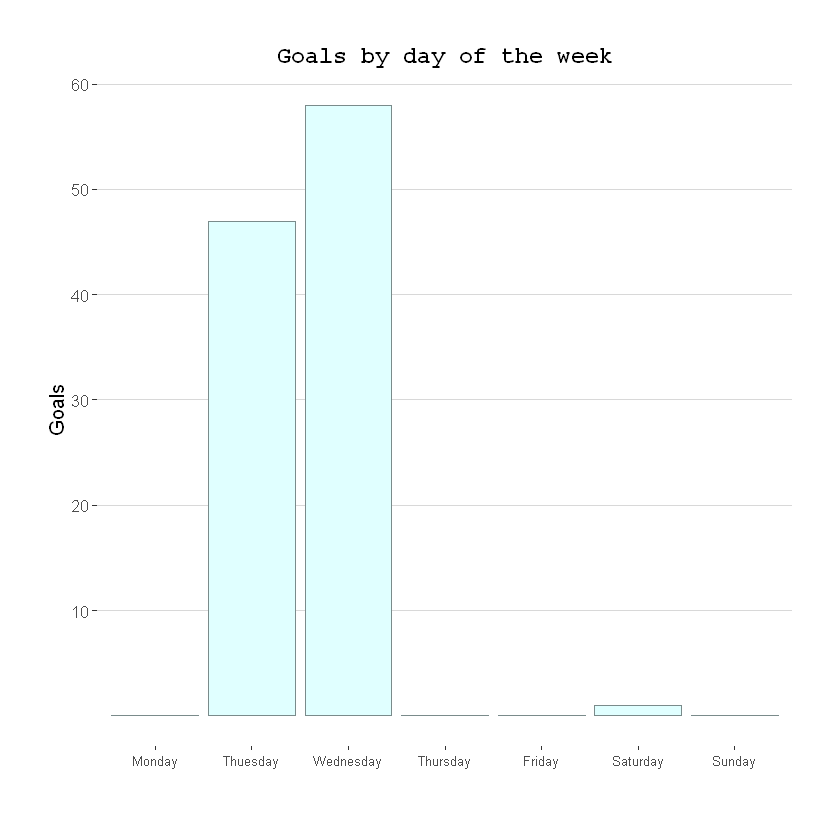

In [47]:
ggplot(df_days)+ geom_bar(aes(x=Day,y=Goals),stat='identity',fill='lightcyan',colour='lightcyan4')+ 
scale_y_continuous(breaks=seq(10,60,10))+ labs(x='',title='Goals by day of the week') + theme_hc() +
theme(plot.title= element_text(hjust = 0.5,face = 'bold',family = 'mono'),
     plot.margin = margin(1,1,1,1, "cm"),
     axis.text.x=element_text(size=8))

### Type of goal

In [48]:
type_goal <- table(champion$Goal.Type,exclude= NULL)
rownames(type_goal)[6] <- "Unknown"
type_goal <- data.frame(type_goal)
colnames(type_goal) <- c('Type_of_goal','Goals')
type_goal = arrange(type_goal,desc(Type_of_goal))
type_goal$porcentage <- round(type_goal$Goals*100/sum(type_goal$Goals))
type_goal$position = cumsum(type_goal$porcentage) - type_goal$porcentage/2
type_goal$label <- paste(type_goal$porcentage,"%")

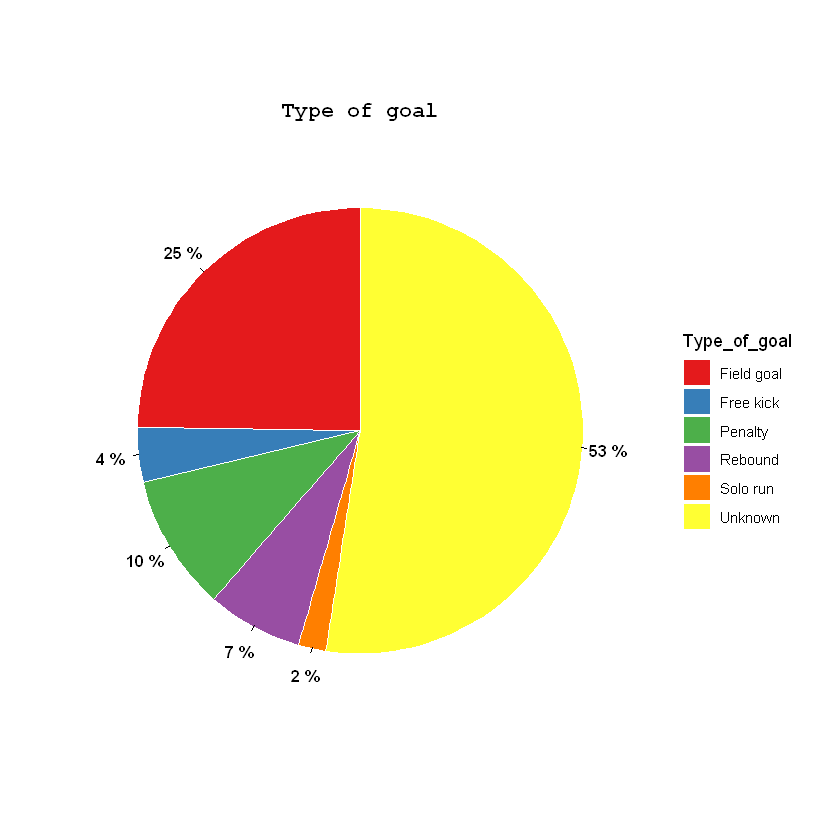

In [49]:
ggplot(type_goal) + geom_bar(aes(x="",y=porcentage,fill=Type_of_goal),col='white',stat = "identity") +
coord_polar(theta="y",start=0) + theme_void() + ggtitle('Type of goal') + 
theme(plot.title= element_text(hjust = 0.5,face = 'bold',family = 'mono'),
     plot.margin = margin(1,1,1,1, "cm")) +
geom_text(aes(x=1.56,y = position , label = label), col='black',size=3.5,fontface =2) +
geom_segment(aes(x = 1.445, y = position, xend = 1.47, yend = position))+
scale_fill_brewer(palette="Set1")

### Global analysis

In [50]:
#Changing to factors
champion$Goal.Method <- as.factor(champion$Goal.Method)
champion$day<- as.factor(champion$day)
champion$month <- as.factor(champion$month)
champion$Final.Game.Result<- as.factor(champion$Final.Game.Result)

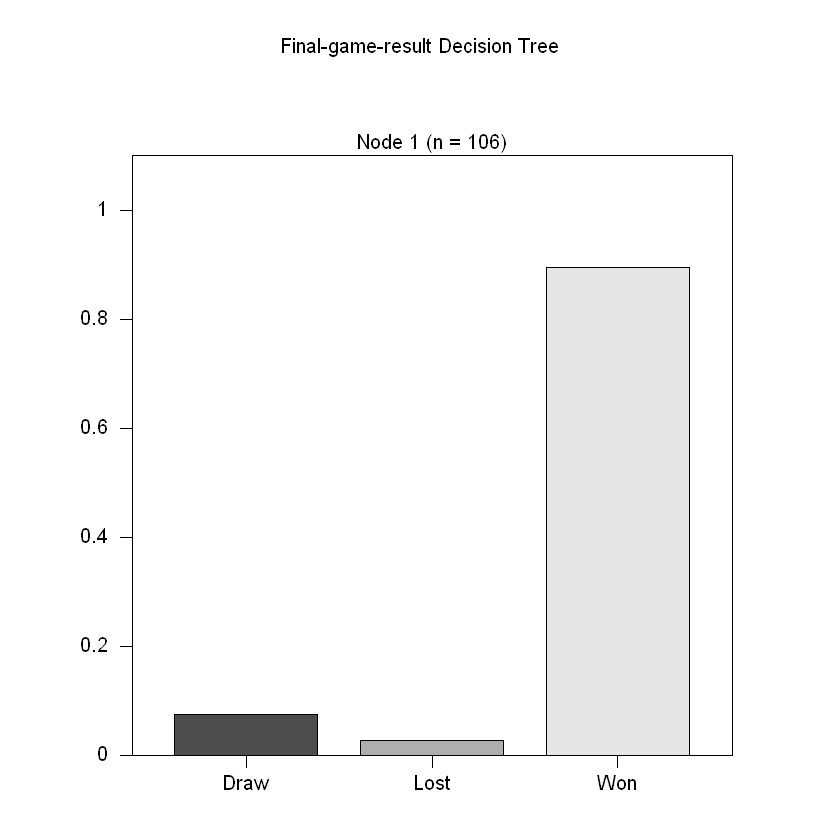

In [51]:
dataset <- champion[,c(5,9,10,11,13)]
tree <- ctree(Final.Game.Result ~.,data= dataset)
plot(tree, main= "Final-game-result Decision Tree")

- On the same way regard to the competition in La Liga, there in no a relationship between the victory of Messi's team and the rest of the attributes.
- There in no a clear dependency on scoring goals by the half of play